![image](https://docs.google.com/uc?export=download&id=15DUc09hFGqR8qcpYiN1OajRNaASmiL6d)

# **Scikit-image Final Bootcamp**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/jpcano1/ISIS_4825_skimage_last/blob/master/Scikit_Image_Final_Bootcamp.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

$$DWI = T2 * e^{b*ADC}$$
$$\frac{-ln(\frac{DWI}{T2})}{b} = ADC$$
$$\frac{-ln(\frac{S}{S_0})}{b}=ADC$$

## **Contenido**
1. **Representación**
    - Ya segmentamos, ¿y ahora qué?
    - Boundary-based Representations
        - Chain code: Representación de un contorno:
            - 4-vecindad
            - 8-vecindad
            - Cadena de Freeman
        - Freeman Chain Code Ejemplo (Open CV)
        - Marching Squares (Scikit Image)
    - Skeletonization:
        - Zhang Method
        - Lee Method
        - Medial Axis Skeletonize
2. **Descripción**
    - Histograma de Gradientes Orientados (HoG)
    
3. **Temas que no sé en qué parte meter**
    - Gabor Filters
    - Blob Detection
    - Measure Region Props
    - Convex Hull
    - Shape Index

In [164]:
import cv2
from skimage import io
from utils import visualization as vis
from skimage.filters import threshold_otsu
from skimage.exposure import equalize_hist
from skimage.measure import find_contours

from skimage.morphology import skeletonize, medial_axis

import matplotlib.pyplot as plt

from skimage import color

In [126]:
url = "https://github.com/PacktPublishing/Python-Image-Processing-Cookbook/blob/master/Chapter%2004/images/planets.png?raw=true"

In [127]:
img = vis.download_content(url, "image.png")

In [128]:
img_gray = color.rgb2gray(img)

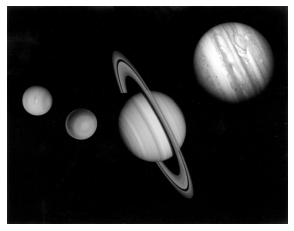

In [129]:
vis.imshow(img_gray)

In [130]:
thresh = threshold_otsu(img_gray)

In [140]:
segmented_img = (img_gray > thresh).astype("uint8")

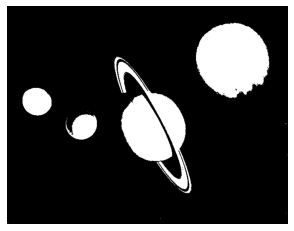

In [141]:
vis.imshow(segmented_img)

In [155]:
contours, _ = cv2.findContours(segmented_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [161]:
draw = cv2.drawContours(img_gray.copy(), contours, -1, (255, 255, 0), 3)

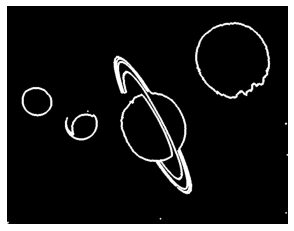

In [162]:
vis.imshow(draw)

In [146]:
contours = find_contours(segmented_img, 0.2)

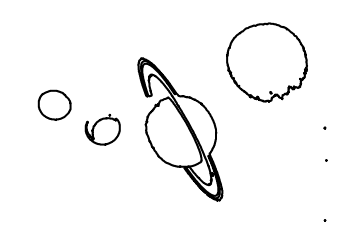

In [150]:
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], color="k", linewidth=2)

plt.ylim(500, 0)
plt.axis("off")
plt.show()

In [50]:
skeleton = skeletonize(segmented_img, method="lee")

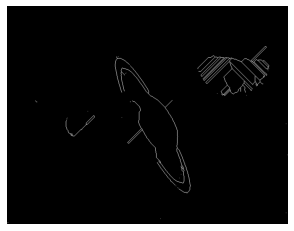

In [51]:
vis.imshow(skeleton)

In [53]:
medial = medial_axis(segmented_img)

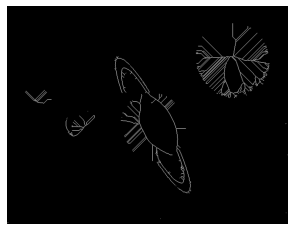

In [54]:
vis.imshow(medial)

In [80]:
url_angio = "https://www.radiologyinfo.org/gallery-items/images/ICA-Angiogram.jpg"

In [81]:
img = vis.download_content(url_angio)

In [82]:
img_gray = color.rgb2gray(img)

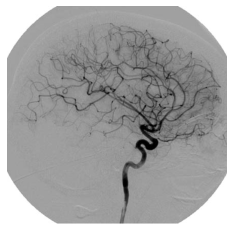

In [83]:
vis.imshow(img_gray)

In [84]:
thresh = threshold_otsu(img_gray)

In [85]:
thresh

0.775390625

In [108]:
segmented = (img_gray < 0.4).astype("uint8")

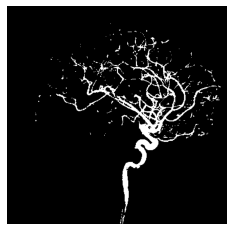

In [109]:
vis.imshow(segmented)

In [110]:
skeleton = skeletonize(segmented)

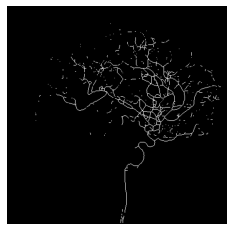

In [111]:
vis.imshow(skeleton)

In [112]:
url_tree = "https://estaticos.muyinteresante.es/media/cache/1000x460_thumb/uploads/images/test/5af18b675bafe8cd7d3c986b/arbol.jpg"

In [114]:
arbol = vis.download_content(url_tree)

In [115]:
arbol_gray = color.rgb2gray(arbol)

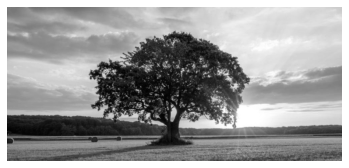

In [116]:
vis.imshow(arbol_gray)

In [117]:
thresh = threshold_otsu(arbol_gray)

In [120]:
segmented = (arbol_gray < thresh).astype("uint8")

In [123]:
skeleton = skeletonize(segmented, method="lee")

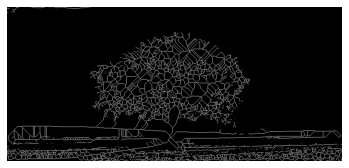

In [124]:
vis.imshow(skeleton)